In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('ds_salaries.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [30]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
df.shape

(3755, 11)

In [33]:
duplicates = df[df.duplicated(keep='last')]

# Drop the duplicate rows from the original dataframe
df_cleaned = df.drop_duplicates()

df_usa=df_cleaned[df_cleaned['company_location']=='US']

# Save the cleaned dataset to a new CSV file
df_usa.to_csv('cleaned_usa_data.csv', index=False)

In [34]:
df_usa.shape

(1929, 11)

In [35]:
df = pd.read_csv("cleaned_usa_data.csv")

In [36]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
1,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
2,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
3,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
4,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1924,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
1925,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1926,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1927,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [37]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

In [38]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [39]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
1,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On-Site,US,LARGE,Data Science
3,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On-Site,US,LARGE,Data Science
4,2023,Senior,Full-time,Data Scientist,147100,USD,147100,US,On-Site,US,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,2021,Senior,Full-time,Data Specialist,165000,USD,165000,US,Full-Remote,US,LARGE,Other
1925,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
1926,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
1927,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science


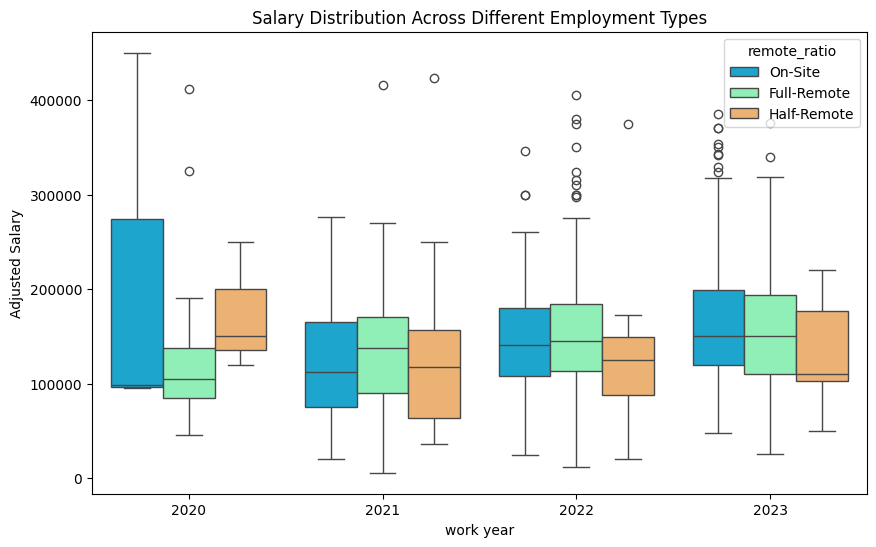

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette='rainbow' , hue='remote_ratio')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('work year')
plt.ylabel('Adjusted Salary')
plt.show()

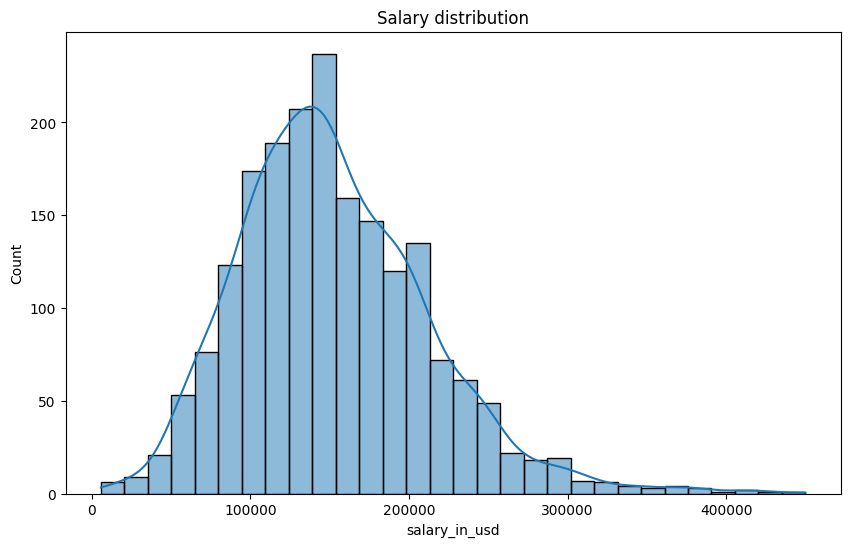

In [41]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary distribution')
plt.show()


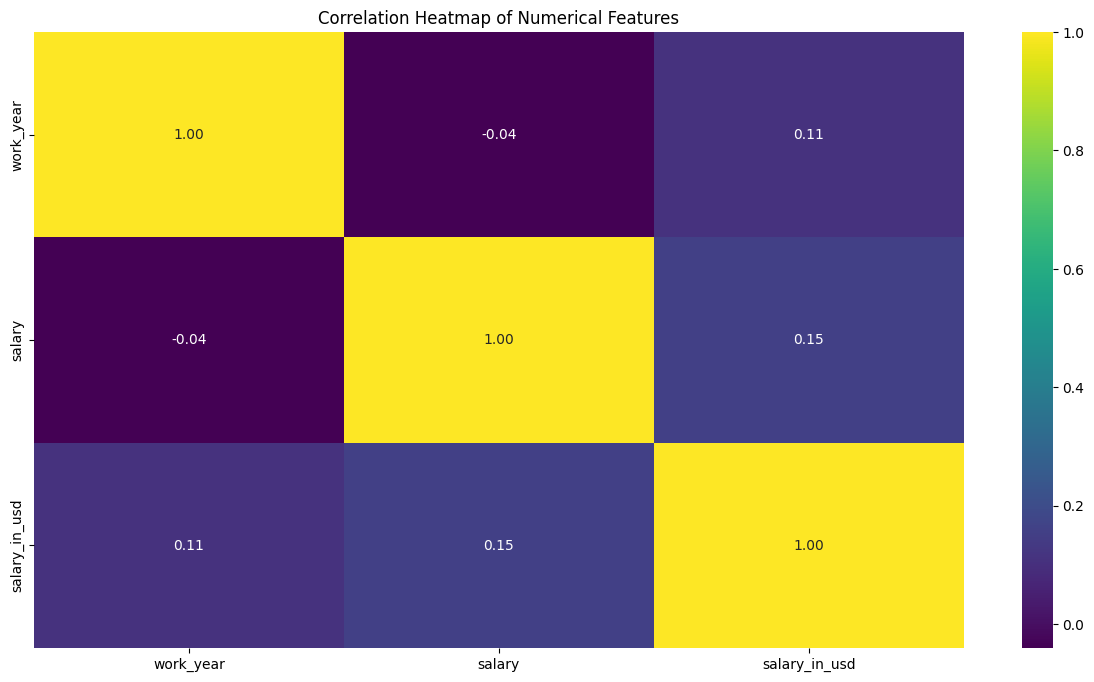

In [42]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


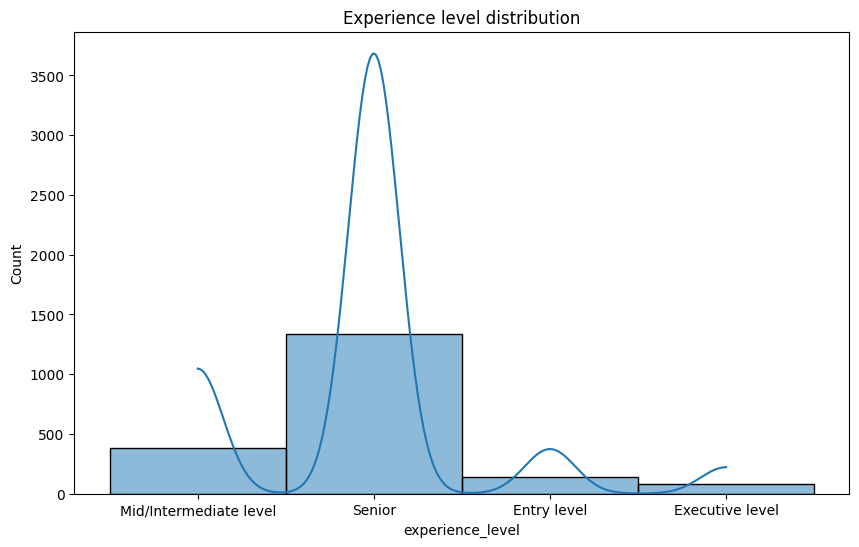

In [43]:
#histogram for experience_level column and salary_in_usd column

plt.figure(figsize=(10,6))
sns.histplot(df['experience_level'], kde=True)
plt.title('Experience level distribution')
plt.show()
